In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import linregress
import numpy as np

In [2]:
#Importing API for Covid Deaths vs All Deaths in a County by State
url = "https://data.cdc.gov/resource/k8wy-p9cg.json"
data = pd.read_json(url)
data.head()

,data_as_of,start_week,end_week,state,county_name,urbanruralcode,fipsstate,fipscounty,fipscode,indicator,all_deaths_total,covid_19_deaths_total,non_hispanic_white,non_hispanic_black,urbanruraldesc,footnote,non_hispanic_american_indian,non_hispanic_asian,other,hispanic
0,2020-09-16T00:00:00.000,2020-02-01T00:00:00.000,2020-09-12T00:00:00.000,AL,Houston County,4,1,69,1069,Distribution of all-cause deaths (%),1278,175,0.742,0.245,Small metro,Data based on counts less than 10 suppressed,NaN,NaN,NaN,NaN
1,2020-09-16T00:00:00.000,2020-02-01T00:00:00.000,2020-09-12T00:00:00.000,AL,Houston County,4,1,69,1069,Distribution of COVID-19 deaths (%),1278,175,0.577,0.400,Small metro,Data based on counts less than 10 suppressed,NaN,NaN,NaN,NaN
2,2020-09-16T00:00:00.000,2020-02-01T00:00:00.000,2020-09-12T00:00:00.000,AL,Houston County,4,1,69,1069,Distribution of population (%),1278,175,0.661,0.271,Small metro,NaN,0.004,0.010,0.020,0.034
3,2020-09-16T00:00:00.000,2020-02-01T00:00:00.000,2020-09-12T00:00:00.000,AL,Jefferson County,1,1,73,1073,Distribution of all-cause deaths (%),6210,503,0.621,0.360,Large central metro,Data based on counts less than 10 suppressed,NaN,0.005,0.002,0.011
4,2020-09-16T00:00:00.000,2020-02-01T00:00:00.000,2020-09-12T00:00:00.000,AL,Jefferson County,1,1,73,1073,Distribution of COVID-19 deaths (%),6210,503,0.577,0.394,Large central metro,Data based on counts less than 10 suppressed,NaN,NaN,NaN,0.020


In [3]:
#Importing CSV file
covid_data = "Resources/covid_data.csv"

In [4]:
#Creating readable files and merging 
covid = pd.read_csv(covid_data)
covid.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
0,9/7/2020,2/1/2020,9/6/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,128,NaN
1,9/7/2020,2/1/2020,9/6/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,622,NaN
2,9/7/2020,2/1/2020,9/6/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"1,571",NaN
3,9/7/2020,2/1/2020,9/6/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"4,363",NaN
4,9/7/2020,2/1/2020,9/6/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"10,436",NaN


In [5]:
#Dropping unnecessary data columns for csv file
covid_complete = covid.drop(['ICD10_codes','Data as of','Start Week', 'End Week', 'Flag'], axis=1)
covid_complete

,State,Condition Group,Condition,Age Group,Number of COVID-19 Deaths
0,US,Respiratory diseases,Influenza and pneumonia,0-24,128
1,US,Respiratory diseases,Influenza and pneumonia,25-34,622
2,US,Respiratory diseases,Influenza and pneumonia,35-44,"1,571"
3,US,Respiratory diseases,Influenza and pneumonia,45-54,"4,363"
4,US,Respiratory diseases,Influenza and pneumonia,55-64,"10,436"
...,...,...,...,...,...
12255,YC,Coronavirus Disease 2019,COVID-19,65-74,"5,028"
12256,YC,Coronavirus Disease 2019,COVID-19,75-84,"5,391"
12257,YC,Coronavirus Disease 2019,COVID-19,85+,"4,846"
12258,YC,Coronavirus Disease 2019,COVID-19,Not stated,NaN


In [6]:
#Merging YC (NYC) and NY state
covid_complete=covid_complete.replace({"NY":"NY","YC":"NY"})
covid_complete=covid_complete.replace({"Intentional and unintentional injury, poisoning and other adverse events":"Intentional and Unintentional Inury"})
covid_complete.head()

,State,Condition Group,Condition,Age Group,Number of COVID-19 Deaths
0,US,Respiratory diseases,Influenza and pneumonia,0-24,128
1,US,Respiratory diseases,Influenza and pneumonia,25-34,622
2,US,Respiratory diseases,Influenza and pneumonia,35-44,"1,571"
3,US,Respiratory diseases,Influenza and pneumonia,45-54,"4,363"
4,US,Respiratory diseases,Influenza and pneumonia,55-64,"10,436"


In [7]:
#Dropped null values
covid_complete= covid_complete.dropna(axis=0)
covid_complete.head()

,State,Condition Group,Condition,Age Group,Number of COVID-19 Deaths
0,US,Respiratory diseases,Influenza and pneumonia,0-24,128
1,US,Respiratory diseases,Influenza and pneumonia,25-34,622
2,US,Respiratory diseases,Influenza and pneumonia,35-44,"1,571"
3,US,Respiratory diseases,Influenza and pneumonia,45-54,"4,363"
4,US,Respiratory diseases,Influenza and pneumonia,55-64,"10,436"


In [8]:
#Removed the US values (wanted only the states)
covid_complete = covid_complete[covid_complete.State!='US']
covid_complete

,State,Condition Group,Condition,Age Group,Number of COVID-19 Deaths
230,AK,Respiratory diseases,Influenza and pneumonia,0-24,0
231,AK,Respiratory diseases,Influenza and pneumonia,25-34,0
232,AK,Respiratory diseases,Influenza and pneumonia,35-44,0
238,AK,Respiratory diseases,Influenza and pneumonia,Not stated,0
239,AK,Respiratory diseases,Influenza and pneumonia,All ages,14
...,...,...,...,...,...
12254,NY,Coronavirus Disease 2019,COVID-19,55-64,"3,273"
12255,NY,Coronavirus Disease 2019,COVID-19,65-74,"5,028"
12256,NY,Coronavirus Disease 2019,COVID-19,75-84,"5,391"
12257,NY,Coronavirus Disease 2019,COVID-19,85+,"4,846"


In [9]:
#Checked data types
covid_complete.dtypes

State                        object
Condition Group              object
Condition                    object
Age Group                    object
Number of COVID-19 Deaths    object
dtype: object

In [10]:
#Replaced , with an empty value and changed to integer
covid_complete["Number of COVID-19 Deaths"]= covid_complete ["Number of COVID-19 Deaths"].apply(lambda x: x.replace(',', '')).astype(int)

In [11]:
#checked data to make sure , was dropped 
covid_complete

,State,Condition Group,Condition,Age Group,Number of COVID-19 Deaths
230,AK,Respiratory diseases,Influenza and pneumonia,0-24,0
231,AK,Respiratory diseases,Influenza and pneumonia,25-34,0
232,AK,Respiratory diseases,Influenza and pneumonia,35-44,0
238,AK,Respiratory diseases,Influenza and pneumonia,Not stated,0
239,AK,Respiratory diseases,Influenza and pneumonia,All ages,14
...,...,...,...,...,...
12254,NY,Coronavirus Disease 2019,COVID-19,55-64,3273
12255,NY,Coronavirus Disease 2019,COVID-19,65-74,5028
12256,NY,Coronavirus Disease 2019,COVID-19,75-84,5391
12257,NY,Coronavirus Disease 2019,COVID-19,85+,4846


In [13]:
#Created Choropleth Map to show deaths by state
fig = px.choropleth(covid_complete,locations="State", locationmode="USA-states", color="Number of COVID-19 Deaths",scope="usa", color_continuous_scale=px.colors.sequential.matter)
fig.show()

In [14]:
covid_complete= covid_complete[covid_complete["Age Group"] != "All ages"]

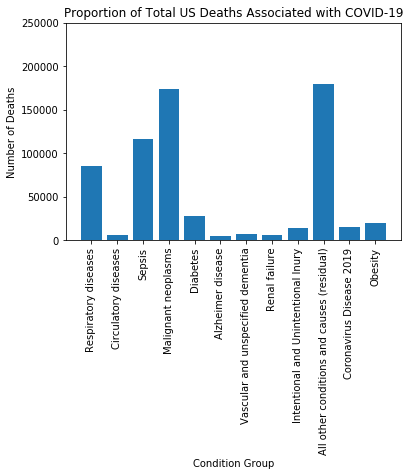

In [16]:
#Creating bar graph to show deaths by condition group
x_axis=covid_complete["Condition Group"].unique()
covid_deaths_state = covid_complete.groupby(["Condition Group"]).sum()["Number of COVID-19 Deaths"]
y_axis= covid_deaths_state

plt.bar(x_axis, y_axis, align= "center")
plt.title("Proportion of Total US Deaths Associated with COVID-19")
plt.ylabel("Number of Deaths")
plt.xlabel("Condition Group")
plt.xticks(rotation=90)
plt.ylim(0,250000)
plt.show()

In [17]:
#Removed the all ages and not stated
covid_deaths_age_group = covid_complete[covid_complete["Age Group"] != "All ages"]
covid_deaths_age_group_2 = covid_deaths_age_group[covid_deaths_age_group["Age Group"] != "Not stated"]

#Sorted Age Group values
covid_deaths_age_group_2 = covid_deaths_age_group_2.sort_values(["Age Group"], ascending=True)

#Counted unique values in Age Group
x_values = covid_deaths_age_group_2['Age Group'].unique()

#Summed up the number of deaths per age group
covid_deaths_age = covid_deaths_age_group_2.groupby(["Age Group"]).sum()["Number of COVID-19 Deaths"]
y_values = covid_deaths_age


The r-squared is: 0.9311576680844321


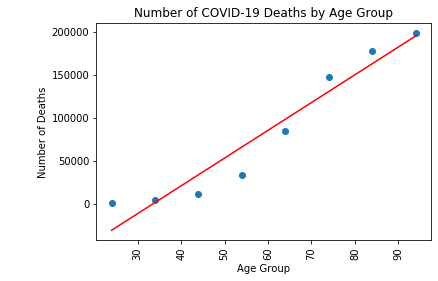

In [18]:
#changed pandas series to a numpy array
y_values_1 = y_values.to_numpy()

#created an numpy array for the age groups
age = np.arange(24,100,10)

#Line regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(age, y_values_1)
regress_values = age * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotted values with line regression
plt.scatter(age,y_values_1)
plt.plot(age,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.title("Number of COVID-19 Deaths by Age Group")
plt.xticks(rotation=90)
print(f"The r-squared is: {rvalue**2}")
plt.show()

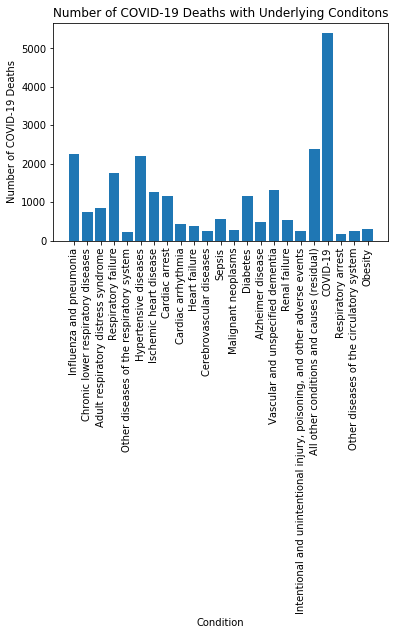

In [19]:
# Generate Bar Plot to show correlation between Condition and Covid-19 deaths
plt.bar(covid_complete.iloc[:,2], covid_complete.iloc[:,4])
plt.xlabel("Condition")
plt.ylabel("Number of COVID-19 Deaths")
plt.title("Number of COVID-19 Deaths with Underlying Conditons")
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

In [20]:
#Create list of all age groups
age_complete = covid_complete[covid_complete["Age Group"] != "All ages"]
age_complete_1 = age_complete[age_complete["Age Group"] != "Not stated"]
age_complete_1
age_complete_1.groupby(["Age Group"]).agg({"Number of COVID-19 Deaths": ["max","min","mean", "median", "var","std","sem"]})
#Determine the largest number of deaths by State then aggregate to the entire United States for each age group for plot
maxdeath = age_complete_1.groupby(["State"]).max()["Number of COVID-19 Deaths"]
maxdeath = maxdeath.reset_index()
mergedata = maxdeath.merge(age_complete_1, on = ["State","Number of COVID-19 Deaths"], how = "left")
mergedata.head(50)

ages = ["0-24","25-34","35-44","45-54","55-64","65-74","75-84","85+"]
covid_death_toll = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for age in ages:
        age_covid_death = mergedata.loc[mergedata["Age Group"] == age,"Number of COVID-19 Deaths"]
        covid_death_toll.append(age_covid_death)
    # Determine outliers using upper and lower bounds
        quartile = age_covid_death.quantile([0.25,0.5,0.75])
        lowerq = quartile[0.25]
        upperq = quartile[0.75]
        IQR = upperq - lowerq
        lowerbound = lowerq - (1.5 * IQR)
        upperbound = upperq + (1.5 * IQR)
        outlier = age_covid_death.loc[(age_covid_death < lowerbound) | (age_covid_death > upperbound)]
        print (f"{age}: {outlier}")



0-24: Series([], Name: Number of COVID-19 Deaths, dtype: int32)
25-34: Series([], Name: Number of COVID-19 Deaths, dtype: int32)
35-44: Series([], Name: Number of COVID-19 Deaths, dtype: int32)
45-54: Series([], Name: Number of COVID-19 Deaths, dtype: int32)
55-64: Series([], Name: Number of COVID-19 Deaths, dtype: int32)
65-74: 8      196
46    3071
Name: Number of COVID-19 Deaths, dtype: int32
75-84: 36    5391
Name: Number of COVID-19 Deaths, dtype: int32
85+: 5     3623
10    3626
15    2295
20    3795
33    4780
40    3403
Name: Number of COVID-19 Deaths, dtype: int32


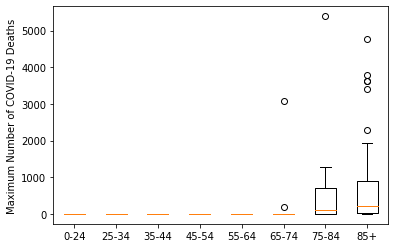

In [21]:
#plotted figure
plt.boxplot(covid_death_toll, labels=ages);
plt.ylabel ("Maximum Number of COVID-19 Deaths")

In [23]:
#Cleaning data set for API

data_1= data.drop(['data_as_of','start_week', 'end_week', 'urbanruralcode',
           'fipsstate','fipscounty','fipscode', 'urbanruraldesc', 'footnote','non_hispanic_white', 'non_hispanic_black','non_hispanic_american_indian','non_hispanic_asian','other','hispanic'], axis=1)
data_1= data_1.rename(columns = {"all_deaths_total" : "All Deaths Total", "covid_19_deaths_total": "COVID-19 Deaths Total"})
#filled null values with 0
data_2=data_1.fillna(0)
data_2.head()

,state,county_name,indicator,All Deaths Total,COVID-19 Deaths Total
0,AL,Houston County,Distribution of all-cause deaths (%),1278,175
1,AL,Houston County,Distribution of COVID-19 deaths (%),1278,175
2,AL,Houston County,Distribution of population (%),1278,175
3,AL,Jefferson County,Distribution of all-cause deaths (%),6210,503
4,AL,Jefferson County,Distribution of COVID-19 deaths (%),6210,503


In [24]:
#Extracted NJ out of data & sorted by COVID deaths
data_state=data_2[data_2["state"]=="NJ"]
data_state.sort_values(["COVID-19 Deaths Total"], ascending=True)
data_state.head()

,state,county_name,indicator,All Deaths Total,COVID-19 Deaths Total
486,NJ,Atlantic County,Distribution of all-cause deaths (%),2019,205
487,NJ,Atlantic County,Distribution of COVID-19 deaths (%),2019,205
488,NJ,Atlantic County,Distribution of population (%),2019,205
489,NJ,Bergen County,Distribution of all-cause deaths (%),6994,2054
490,NJ,Bergen County,Distribution of COVID-19 deaths (%),6994,2054


In [25]:
#Extracted information for Distribution of all deaths
data_nj=data_state[data_state["indicator"]=='Distribution of all-cause deaths (%)']
data_nj.head()

,state,county_name,indicator,All Deaths Total,COVID-19 Deaths Total
486,NJ,Atlantic County,Distribution of all-cause deaths (%),2019,205
489,NJ,Bergen County,Distribution of all-cause deaths (%),6994,2054
492,NJ,Burlington County,Distribution of all-cause deaths (%),2609,426
495,NJ,Camden County,Distribution of all-cause deaths (%),4321,554
498,NJ,Cumberland County,Distribution of all-cause deaths (%),1079,117


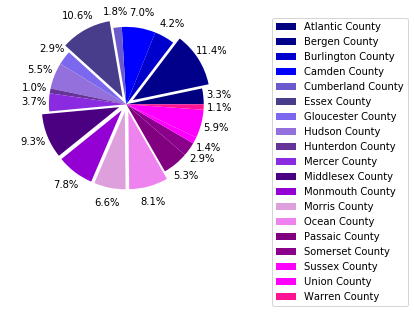

In [26]:
#Created Pie Chart of all deaths per county in NJ
explode = (0,.1,0,0,0,.1,0,0,0,0,.1,.1,.1,.1,0,0,0,0,0)
colors = ['navy', 'darkblue', 'mediumblue','blue','slateblue','darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple','blueviolet','indigo','darkviolet','plum','violet','purple','darkmagenta','fuchsia','magenta','deeppink']
plt.pie(data_nj["All Deaths Total"], autopct="%1.1f%%", explode=explode, pctdistance=1.2, labeldistance=1.2, colors=colors);
plt.axis("equal")
plt.legend(data_nj["county_name"], bbox_to_anchor=(1.1, 1))
plt.tight_layout()

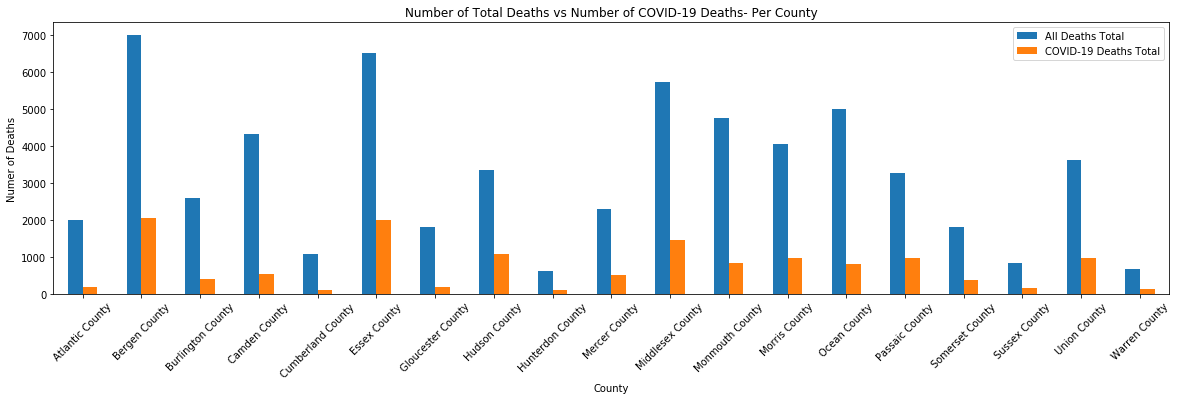

<Figure size 432x288 with 0 Axes>

In [27]:
# Filter the DataFrame down only to those columns to chart
nj_county_info = data_nj[["county_name","All Deaths Total","COVID-19 Deaths Total"]]

# Set the index to be "county_name" so they will be used as labels
nj_county_info = nj_county_info.set_index("county_name")



#plot multiple columns if the DataFrame includes them
multi_plot_nj = nj_county_info.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot_nj.set_xticklabels(data_nj["county_name"], rotation=45)
plt.xlabel("County")
plt.ylabel("Numer of Deaths")
plt.title("Number of Total Deaths vs Number of COVID-19 Deaths- Per County")
plt.show()
plt.tight_layout()
